In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

drive.mount('/gdrive')
%matplotlib inline

Mounted at /gdrive


In [71]:
df = pd.read_csv('/gdrive/MyDrive/Laboratorio 4 /VirusSample.csv')

In [72]:
df.head()

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus


In [73]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

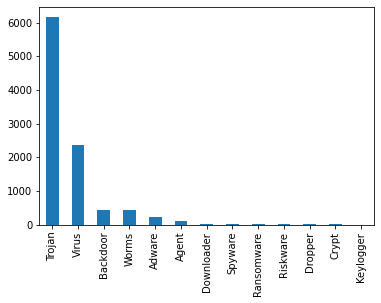

In [74]:
df['class'].value_counts().plot(kind='bar')

In [75]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

In [76]:
df = df.drop(df.index[df['class'] == "Crypt"])
df = df.drop(df.index[df['class'] == "Dropper"])
df = df.drop(df.index[df['class'] == "Riskware"])
df = df.drop(df.index[df['class'] == "Ransoware"])
df = df.drop(df.index[df['class'] == "Spyware"])
df = df.drop(df.index[df['class'] == "Downloader"])
df = df.drop(df.index[df['class'] == "Keylogger"])



In [77]:
df['class'].value_counts()

Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Ransomware      10
Name: class, dtype: int64

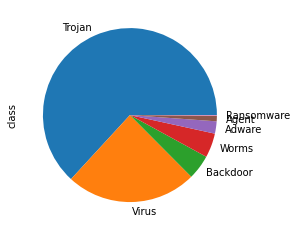

In [78]:
df['class'].value_counts().plot(kind='pie')

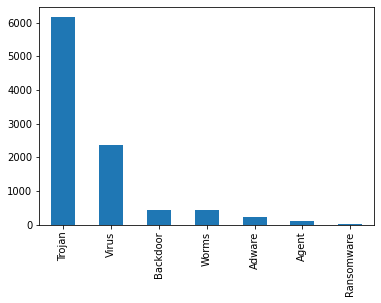

In [79]:
df['class'].value_counts().plot(kind='bar')

In [80]:
leas = LabelEncoder()
df['class'] = leas.fit_transform(df['class'])
df.file = leas.fit_transform(df.file)
df.api = leas.fit_transform(df.api)
df

,file,api,class
0,4891,1243,5
1,3107,600,5
2,9423,2506,5
3,2029,2250,5
4,83,2131,5
...,...,...,...
9790,2244,1614,4
9791,3236,2063,4
9792,8396,2716,4
9793,7869,1210,4


In [81]:
t = df['class']
df_01 = df[['file', 'api']]

In [82]:
df_01

,file,api
0,4891,1243
1,3107,600
2,9423,2506
3,2029,2250
4,83,2131
...,...,...
9790,2244,1614
9791,3236,2063
9792,8396,2716
9793,7869,1210


In [83]:
t

0       5
1       5
2       5
3       5
4       5
       ..
9790    4
9791    4
9792    4
9793    4
9794    4
Name: class, Length: 9742, dtype: int64

In [84]:
# Usando Min y Max
ho = MinMaxScaler()
ho.fit(df_01)
df_01 = pd.DataFrame(ho.transform(df_01))

df_01

,0,1
0,0.502105,0.421642
1,0.318961,0.203528
2,0.967354,0.850068
3,0.208295,0.763229
4,0.008521,0.722863
...,...,...
9737,0.230366,0.547490
9738,0.332204,0.699796
9739,0.861924,0.921303
9740,0.807823,0.410448


In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_01, t, train_size=0.7, 
                                                    test_size=0.3, random_state=5)

# Naive bayes

```
# Usando algoritmo importando librerias
```



In [86]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df_01, t, train_size=0.7, 
                                                                    test_size=0.3, random_state=50)

In [87]:
model1 = MultinomialNB()
model1.fit(x_train_bow, y_train_bow)

MultinomialNB()

In [88]:
model1_f = model1.predict(x_test_bow)
accuracy_score(y_test_bow, model1_f)

0.6301744782757441

In [91]:
confusion_matrix(y_test_bow, model1_f)
print(classification_report(y_test_bow, model1_f))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00       134
           3       0.00      0.00      0.00         3
           4       0.63      1.00      0.77      1842
           5       0.00      0.00      0.00       718
           6       0.00      0.00      0.00       129

    accuracy                           0.63      2923
   macro avg       0.09      0.14      0.11      2923
weighted avg       0.40      0.63      0.49      2923



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree classifier

In [92]:
ds = DecisionTreeClassifier()
ds = ds.fit(x_train, y_train)

In [93]:
pred = ds.predict(x_test)
accuracy_score(y_test, pred)

0.8843653780362641

In [95]:
confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        79
           1       0.35      0.38      0.37        29
           2       0.88      0.84      0.86       128
           3       0.00      0.00      0.00         2
           4       0.91      0.93      0.92      1842
           5       0.89      0.85      0.87       722
           6       0.66      0.73      0.69       121

    accuracy                           0.88      2923
   macro avg       0.64      0.63      0.64      2923
weighted avg       0.89      0.88      0.88      2923

